### Mount gdrive
### This cell is for Google colaboratory users.

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/My\ Drive/DNNTopology

### Parameter setting

In [0]:
simplexDir = "simplexes"
#simplexDir = "simplexes/sample"

### Import libraries

In [3]:
# import dionysus
!pip install dionysus
import dionysus as d
import pickle
from scipy.spatial import ConvexHull
import numpy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.6-cp36-cp36m-linux_x86_64.whl size=355329 sha256=faf505865812e23894643042db3818ada4f4b149324d518b8cad74494c53becb
  Stored in directory: /root/.cache/pip/wheels/18/42/ed/40d587d62cfde0767cb6d0d3fb9c8f5c9c64e83b647f14365d
Successfully built dionysus


## Register simplex

In [0]:
fil = d.Filtration()

In [5]:
for i in range(1,65): 
  filename = simplexDir +"/Simplex" + str(i)
  with open(filename, 'rb') as simplex:
    temp = pickle.load(simplex)
    print (str(i) + ", ", end = "")
    for e in temp:
      fil.add( d.Simplex(e, i) )

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 

### Visualization

In [0]:
fil.sort()
m = d.homology_persistence(fil, prime=2)
dgms = d.init_diagrams(m, fil)

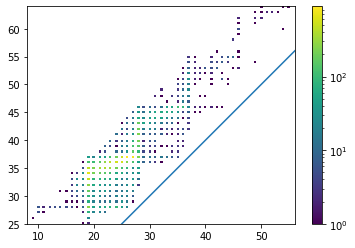

In [7]:
d.plot.plot_diagram_density(dgms[1], show=True, diagonal = True)

### Number of homologies and convex hull

In [0]:
homologyList0 = []
homologyList1 = []
homologyList2 = []
for i, dgm in enumerate(dgms):
  for p in dgm:
    birth = p.birth
    death = p.death
    if i == 0:
      homologyList0.append([birth,death])
    elif i == 1:
      homologyList1.append([birth,death])
    elif i == 2:
      homologyList2.append([birth,death])

In [9]:
inf = float('inf')
numHom = len( [ hom for hom in homologyList1 if hom[1] != inf ])

points = numpy.array([hom for hom in homologyList1 if hom[1] != inf])
hull = ConvexHull(points)
volume = hull.volume
print ("Number of homologies is %d" % numHom )
print ("Size of convex hull is %10.10f" % hull.volume)

Number of homologies is 16291
Size of convex hull is 536.5000000000
